# WGAN Training

## imports

In [1]:
%matplotlib inline

import os
import numpy as np
import matplotlib.pyplot as plt

from models.WGAN import WGAN
from utils.loaders import load_cifar



In [2]:
# run params
SECTION = 'gan'
RUN_ID = '0002'
DATA_NAME = 'horses'
RUN_FOLDER = 'run/{}/'.format(SECTION)
RUN_FOLDER += '_'.join([RUN_ID, DATA_NAME])

if not os.path.exists(RUN_FOLDER):
    os.mkdir(RUN_FOLDER)
    os.mkdir(os.path.join(RUN_FOLDER, 'viz'))
    os.mkdir(os.path.join(RUN_FOLDER, 'images'))
    os.mkdir(os.path.join(RUN_FOLDER, 'weights'))

mode =  'build' #'load' #


## data

In [3]:
if DATA_NAME == 'cars':
    label = 1
elif DATA_NAME == 'horses':
    label = 7
(x_train, y_train) = load_cifar(label, 10)


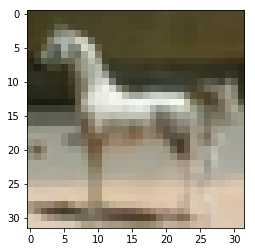

In [8]:
plt.imshow((x_train[150,:,:,:]+1)/2)

## architecture

In [9]:

if mode == 'build':

    gan = WGAN(input_dim = (32,32,3)
            , critic_conv_filters = [32,64,128,128]
            , critic_conv_kernel_size = [5,5,5,5]
            , critic_conv_strides = [2,2,2,1]
            , critic_batch_norm_momentum = None
            , critic_activation = 'leaky_relu'
            , critic_dropout_rate = None
            , critic_learning_rate = 0.00005
            , generator_initial_dense_layer_size = (4, 4, 128)
            , generator_upsample = [2,2, 2,1]
            , generator_conv_filters = [128,64,32,3]
            , generator_conv_kernel_size = [5,5,5,5]
            , generator_conv_strides = [1,1, 1,1]
            , generator_batch_norm_momentum = 0.8
            , generator_activation = 'leaky_relu'
            , generator_dropout_rate = None
            , generator_learning_rate = 0.00005
            , optimiser = 'rmsprop'
            , z_dim = 100
            )
    gan.save(RUN_FOLDER)

else:
    gan.load_weights(os.path.join(RUN_FOLDER, 'weights/weights.h5'))


In [10]:
gan.critic.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
critic_input (InputLayer)    [(None, 32, 32, 3)]       0         
_________________________________________________________________
critic_conv_0 (Conv2D)       (None, 16, 16, 32)        2432      
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 16, 16, 32)        0         
_________________________________________________________________
critic_conv_1 (Conv2D)       (None, 8, 8, 64)          51264     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 8, 8, 64)          0         
_________________________________________________________________
critic_conv_2 (Conv2D)       (None, 4, 4, 128)         204928    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 4, 4, 128)        

In [11]:
gan.generator.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
generator_input (InputLayer) [(None, 100)]             0         
_________________________________________________________________
dense_1 (Dense)              (None, 2048)              206848    
_________________________________________________________________
batch_normalization (BatchNo (None, 2048)              8192      
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 2048)              0         
_________________________________________________________________
reshape (Reshape)            (None, 4, 4, 128)         0         
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 8, 8, 128)         0         
_________________________________________________________________
generator_conv_0 (Conv2D)    (None, 8, 8, 128)        

## training

In [12]:
BATCH_SIZE = 128
EPOCHS = 6000
PRINT_EVERY_N_BATCHES = 5
N_CRITIC = 5
CLIP_THRESHOLD = 0.01

In [13]:
gan.train(     
    x_train
    , batch_size = BATCH_SIZE
    , epochs = EPOCHS
    , run_folder = RUN_FOLDER
    , print_every_n_batches = PRINT_EVERY_N_BATCHES
    , n_critic = N_CRITIC
    , clip_threshold = CLIP_THRESHOLD
)

0 [D loss: (-0.000)(R -0.001, F 0.000)]  [G loss: -0.000] 
1 [D loss: (-0.000)(R -0.001, F 0.000)]  [G loss: -0.001] 
2 [D loss: (-0.002)(R -0.004, F 0.000)]  [G loss: -0.002] 
3 [D loss: (-0.008)(R -0.017, F 0.000)]  [G loss: -0.008] 
4 [D loss: (-0.027)(R -0.057, F 0.003)]  [G loss: -0.034] 
5 [D loss: (-0.058)(R -0.132, F 0.016)]  [G loss: -0.090] 
6 [D loss: (-0.108)(R -0.256, F 0.040)]  [G loss: -0.191] 
7 [D loss: (-0.191)(R -0.438, F 0.057)]  [G loss: -0.374] 
8 [D loss: (-0.284)(R -0.657, F 0.088)]  [G loss: -0.653] 
9 [D loss: (-0.447)(R -1.009, F 0.116)]  [G loss: -1.129] 
10 [D loss: (-0.650)(R -1.498, F 0.197)]  [G loss: -1.820] 
11 [D loss: (-0.841)(R -1.997, F 0.315)]  [G loss: -2.809] 
12 [D loss: (-1.086)(R -2.782, F 0.611)]  [G loss: -4.112] 
13 [D loss: (-1.223)(R -3.426, F 0.979)]  [G loss: -5.694] 
14 [D loss: (-1.182)(R -4.089, F 1.724)]  [G loss: -7.016] 
15 [D loss: (-1.125)(R -4.701, F 2.451)]  [G loss: -8.355] 
16 [D loss: (-0.800)(R -4.804, F 3.205)]  [G loss:

138 [D loss: (-0.216)(R 0.500, F -0.933)]  [G loss: 1.350] 
139 [D loss: (0.025)(R 0.560, F -0.510)]  [G loss: 0.775] 
140 [D loss: (0.089)(R 0.336, F -0.158)]  [G loss: 0.499] 
141 [D loss: (0.079)(R 0.290, F -0.133)]  [G loss: 0.105] 
142 [D loss: (0.113)(R 0.222, F 0.004)]  [G loss: 0.058] 
143 [D loss: (0.077)(R -0.015, F 0.169)]  [G loss: -0.050] 
144 [D loss: (0.046)(R 0.001, F 0.091)]  [G loss: 0.087] 
145 [D loss: (0.016)(R -0.012, F 0.045)]  [G loss: 0.172] 
146 [D loss: (-0.058)(R -0.117, F 0.001)]  [G loss: 0.187] 
147 [D loss: (-0.115)(R -0.152, F -0.078)]  [G loss: 0.264] 
148 [D loss: (-0.177)(R -0.186, F -0.168)]  [G loss: 0.325] 
149 [D loss: (-0.198)(R -0.198, F -0.198)]  [G loss: 0.358] 
150 [D loss: (-0.303)(R -0.447, F -0.160)]  [G loss: 0.406] 
151 [D loss: (-0.317)(R -0.458, F -0.176)]  [G loss: 0.281] 
152 [D loss: (-0.361)(R -0.667, F -0.055)]  [G loss: 0.175] 
153 [D loss: (-0.198)(R -0.749, F 0.353)]  [G loss: -0.049] 
154 [D loss: (0.005)(R -0.499, F 0.510)] 

275 [D loss: (0.023)(R -0.093, F 0.140)]  [G loss: -0.097] 
276 [D loss: (0.018)(R -0.098, F 0.135)]  [G loss: -0.086] 
277 [D loss: (0.005)(R -0.084, F 0.094)]  [G loss: -0.064] 
278 [D loss: (-0.009)(R -0.083, F 0.064)]  [G loss: -0.045] 
279 [D loss: (-0.019)(R -0.087, F 0.048)]  [G loss: -0.038] 
280 [D loss: (-0.014)(R -0.104, F 0.076)]  [G loss: -0.059] 
281 [D loss: (-0.012)(R -0.114, F 0.090)]  [G loss: -0.092] 
282 [D loss: (-0.003)(R -0.122, F 0.115)]  [G loss: -0.105] 
283 [D loss: (-0.012)(R -0.120, F 0.096)]  [G loss: -0.097] 
284 [D loss: (-0.033)(R -0.148, F 0.081)]  [G loss: -0.063] 
285 [D loss: (-0.030)(R -0.108, F 0.048)]  [G loss: -0.015] 
286 [D loss: (-0.049)(R -0.107, F 0.010)]  [G loss: 0.027] 
287 [D loss: (-0.019)(R -0.059, F 0.021)]  [G loss: 0.022] 
288 [D loss: (-0.015)(R -0.064, F 0.035)]  [G loss: 0.003] 
289 [D loss: (-0.012)(R -0.053, F 0.028)]  [G loss: 0.004] 
290 [D loss: (-0.001)(R -0.029, F 0.027)]  [G loss: 0.001] 
291 [D loss: (-0.019)(R -0.042, 

411 [D loss: (0.008)(R -0.016, F 0.032)]  [G loss: 0.007] 
412 [D loss: (0.008)(R -0.014, F 0.030)]  [G loss: -0.005] 
413 [D loss: (-0.003)(R -0.020, F 0.015)]  [G loss: -0.003] 
414 [D loss: (-0.011)(R -0.031, F 0.010)]  [G loss: -0.002] 
415 [D loss: (-0.006)(R -0.027, F 0.015)]  [G loss: 0.003] 
416 [D loss: (-0.014)(R -0.031, F 0.002)]  [G loss: 0.019] 
417 [D loss: (-0.021)(R -0.030, F -0.011)]  [G loss: 0.024] 
418 [D loss: (-0.019)(R -0.040, F 0.002)]  [G loss: 0.018] 
419 [D loss: (-0.013)(R -0.037, F 0.011)]  [G loss: -0.003] 
420 [D loss: (-0.014)(R -0.034, F 0.006)]  [G loss: -0.002] 
421 [D loss: (-0.028)(R -0.022, F -0.034)]  [G loss: 0.003] 
422 [D loss: (-0.034)(R -0.035, F -0.033)]  [G loss: 0.005] 
423 [D loss: (-0.015)(R -0.026, F -0.003)]  [G loss: 0.001] 
424 [D loss: (0.011)(R -0.019, F 0.041)]  [G loss: -0.008] 
425 [D loss: (0.018)(R -0.033, F 0.068)]  [G loss: -0.014] 
426 [D loss: (0.000)(R -0.037, F 0.038)]  [G loss: -0.009] 
427 [D loss: (-0.015)(R -0.039, F

547 [D loss: (-0.006)(R -0.063, F 0.051)]  [G loss: -0.033] 
548 [D loss: (-0.011)(R -0.075, F 0.052)]  [G loss: -0.033] 
549 [D loss: (-0.009)(R -0.069, F 0.051)]  [G loss: -0.026] 
550 [D loss: (-0.005)(R -0.048, F 0.038)]  [G loss: -0.023] 
551 [D loss: (-0.014)(R -0.059, F 0.032)]  [G loss: -0.018] 
552 [D loss: (-0.008)(R -0.040, F 0.024)]  [G loss: -0.014] 
553 [D loss: (-0.006)(R -0.041, F 0.029)]  [G loss: -0.005] 
554 [D loss: (-0.010)(R -0.049, F 0.028)]  [G loss: -0.006] 
555 [D loss: (-0.017)(R -0.037, F 0.004)]  [G loss: -0.004] 
556 [D loss: (-0.008)(R -0.045, F 0.029)]  [G loss: -0.019] 
557 [D loss: (-0.006)(R -0.032, F 0.019)]  [G loss: -0.024] 
558 [D loss: (-0.009)(R -0.048, F 0.029)]  [G loss: -0.011] 
559 [D loss: (-0.008)(R -0.037, F 0.020)]  [G loss: -0.009] 
560 [D loss: (-0.010)(R -0.039, F 0.019)]  [G loss: -0.001] 
561 [D loss: (-0.018)(R -0.042, F 0.006)]  [G loss: 0.002] 
562 [D loss: (-0.016)(R -0.047, F 0.015)]  [G loss: -0.002] 
563 [D loss: (-0.015)(R -

682 [D loss: (-0.022)(R -0.126, F 0.081)]  [G loss: -0.061] 
683 [D loss: (0.000)(R -0.115, F 0.116)]  [G loss: -0.059] 
684 [D loss: (-0.002)(R -0.118, F 0.115)]  [G loss: -0.055] 
685 [D loss: (-0.011)(R -0.100, F 0.078)]  [G loss: -0.048] 
686 [D loss: (-0.018)(R -0.097, F 0.062)]  [G loss: -0.043] 
687 [D loss: (-0.021)(R -0.096, F 0.053)]  [G loss: -0.013] 
688 [D loss: (-0.014)(R -0.077, F 0.048)]  [G loss: -0.012] 
689 [D loss: (-0.020)(R -0.075, F 0.035)]  [G loss: -0.011] 
690 [D loss: (-0.014)(R -0.058, F 0.029)]  [G loss: -0.020] 
691 [D loss: (0.002)(R -0.046, F 0.050)]  [G loss: -0.019] 
692 [D loss: (-0.003)(R -0.060, F 0.055)]  [G loss: -0.033] 
693 [D loss: (0.001)(R -0.055, F 0.056)]  [G loss: -0.041] 
694 [D loss: (-0.004)(R -0.064, F 0.056)]  [G loss: -0.033] 
695 [D loss: (-0.003)(R -0.061, F 0.055)]  [G loss: -0.036] 
696 [D loss: (-0.010)(R -0.066, F 0.046)]  [G loss: -0.034] 
697 [D loss: (-0.012)(R -0.070, F 0.046)]  [G loss: -0.032] 
698 [D loss: (-0.003)(R -0.

817 [D loss: (-0.005)(R -0.112, F 0.101)]  [G loss: -0.081] 
818 [D loss: (0.007)(R -0.103, F 0.116)]  [G loss: -0.095] 
819 [D loss: (0.002)(R -0.105, F 0.109)]  [G loss: -0.094] 
820 [D loss: (-0.004)(R -0.105, F 0.097)]  [G loss: -0.092] 
821 [D loss: (0.005)(R -0.113, F 0.122)]  [G loss: -0.109] 
822 [D loss: (0.007)(R -0.112, F 0.126)]  [G loss: -0.110] 
823 [D loss: (0.010)(R -0.099, F 0.119)]  [G loss: -0.103] 
824 [D loss: (-0.001)(R -0.116, F 0.115)]  [G loss: -0.105] 
825 [D loss: (0.004)(R -0.109, F 0.117)]  [G loss: -0.112] 
826 [D loss: (-0.011)(R -0.111, F 0.089)]  [G loss: -0.091] 
827 [D loss: (-0.002)(R -0.116, F 0.112)]  [G loss: -0.086] 
828 [D loss: (0.001)(R -0.107, F 0.109)]  [G loss: -0.090] 
829 [D loss: (-0.013)(R -0.123, F 0.098)]  [G loss: -0.086] 
830 [D loss: (-0.008)(R -0.118, F 0.103)]  [G loss: -0.085] 
831 [D loss: (-0.005)(R -0.114, F 0.105)]  [G loss: -0.091] 
832 [D loss: (-0.008)(R -0.111, F 0.095)]  [G loss: -0.079] 
833 [D loss: (-0.012)(R -0.117,

952 [D loss: (-0.009)(R -0.088, F 0.070)]  [G loss: -0.055] 
953 [D loss: (-0.011)(R -0.102, F 0.079)]  [G loss: -0.058] 
954 [D loss: (-0.007)(R -0.101, F 0.086)]  [G loss: -0.063] 
955 [D loss: (-0.013)(R -0.095, F 0.068)]  [G loss: -0.048] 
956 [D loss: (-0.017)(R -0.103, F 0.069)]  [G loss: -0.054] 
957 [D loss: (-0.012)(R -0.101, F 0.077)]  [G loss: -0.051] 
958 [D loss: (-0.023)(R -0.105, F 0.059)]  [G loss: -0.041] 
959 [D loss: (-0.017)(R -0.103, F 0.069)]  [G loss: -0.039] 
960 [D loss: (-0.011)(R -0.088, F 0.065)]  [G loss: -0.041] 
961 [D loss: (-0.016)(R -0.100, F 0.069)]  [G loss: -0.040] 
962 [D loss: (-0.012)(R -0.100, F 0.076)]  [G loss: -0.052] 
963 [D loss: (-0.014)(R -0.109, F 0.081)]  [G loss: -0.060] 
964 [D loss: (-0.011)(R -0.095, F 0.073)]  [G loss: -0.052] 
965 [D loss: (-0.015)(R -0.102, F 0.072)]  [G loss: -0.058] 
966 [D loss: (-0.011)(R -0.100, F 0.079)]  [G loss: -0.060] 
967 [D loss: (-0.011)(R -0.099, F 0.077)]  [G loss: -0.053] 
968 [D loss: (-0.015)(R 

1085 [D loss: (-0.011)(R -0.097, F 0.074)]  [G loss: -0.062] 
1086 [D loss: (-0.009)(R -0.099, F 0.081)]  [G loss: -0.060] 
1087 [D loss: (-0.007)(R -0.101, F 0.087)]  [G loss: -0.063] 
1088 [D loss: (-0.016)(R -0.102, F 0.071)]  [G loss: -0.058] 
1089 [D loss: (-0.013)(R -0.096, F 0.069)]  [G loss: -0.044] 
1090 [D loss: (-0.016)(R -0.104, F 0.073)]  [G loss: -0.051] 
1091 [D loss: (-0.023)(R -0.116, F 0.071)]  [G loss: -0.066] 
1092 [D loss: (-0.021)(R -0.101, F 0.059)]  [G loss: -0.052] 
1093 [D loss: (-0.019)(R -0.105, F 0.068)]  [G loss: -0.056] 
1094 [D loss: (-0.008)(R -0.108, F 0.091)]  [G loss: -0.060] 
1095 [D loss: (-0.013)(R -0.109, F 0.083)]  [G loss: -0.066] 
1096 [D loss: (-0.014)(R -0.116, F 0.089)]  [G loss: -0.076] 
1097 [D loss: (-0.018)(R -0.104, F 0.068)]  [G loss: -0.062] 
1098 [D loss: (-0.005)(R -0.097, F 0.087)]  [G loss: -0.065] 
1099 [D loss: (-0.015)(R -0.097, F 0.067)]  [G loss: -0.045] 
1100 [D loss: (-0.015)(R -0.099, F 0.068)]  [G loss: -0.050] 
1101 [D 

1218 [D loss: (-0.018)(R -0.125, F 0.088)]  [G loss: -0.065] 
1219 [D loss: (-0.017)(R -0.116, F 0.082)]  [G loss: -0.064] 
1220 [D loss: (-0.026)(R -0.124, F 0.073)]  [G loss: -0.059] 
1221 [D loss: (-0.012)(R -0.118, F 0.093)]  [G loss: -0.068] 
1222 [D loss: (-0.012)(R -0.122, F 0.098)]  [G loss: -0.075] 
1223 [D loss: (-0.012)(R -0.114, F 0.090)]  [G loss: -0.061] 
1224 [D loss: (-0.010)(R -0.094, F 0.074)]  [G loss: -0.056] 
1225 [D loss: (-0.021)(R -0.127, F 0.086)]  [G loss: -0.063] 
1226 [D loss: (-0.013)(R -0.118, F 0.092)]  [G loss: -0.076] 
1227 [D loss: (-0.016)(R -0.117, F 0.085)]  [G loss: -0.061] 
1228 [D loss: (-0.017)(R -0.119, F 0.085)]  [G loss: -0.066] 
1229 [D loss: (-0.014)(R -0.118, F 0.090)]  [G loss: -0.072] 
1230 [D loss: (-0.016)(R -0.125, F 0.092)]  [G loss: -0.069] 
1231 [D loss: (-0.022)(R -0.132, F 0.088)]  [G loss: -0.082] 
1232 [D loss: (-0.014)(R -0.121, F 0.093)]  [G loss: -0.081] 
1233 [D loss: (-0.012)(R -0.126, F 0.102)]  [G loss: -0.083] 
1234 [D 

1351 [D loss: (-0.034)(R -0.155, F 0.088)]  [G loss: -0.089] 
1352 [D loss: (-0.023)(R -0.164, F 0.118)]  [G loss: -0.098] 
1353 [D loss: (-0.013)(R -0.144, F 0.117)]  [G loss: -0.104] 
1354 [D loss: (-0.019)(R -0.146, F 0.108)]  [G loss: -0.102] 
1355 [D loss: (-0.018)(R -0.147, F 0.111)]  [G loss: -0.079] 
1356 [D loss: (-0.019)(R -0.149, F 0.112)]  [G loss: -0.089] 
1357 [D loss: (-0.014)(R -0.148, F 0.120)]  [G loss: -0.104] 
1358 [D loss: (-0.009)(R -0.144, F 0.125)]  [G loss: -0.097] 
1359 [D loss: (-0.020)(R -0.143, F 0.103)]  [G loss: -0.072] 
1360 [D loss: (-0.023)(R -0.140, F 0.093)]  [G loss: -0.077] 
1361 [D loss: (-0.018)(R -0.147, F 0.111)]  [G loss: -0.083] 
1362 [D loss: (-0.022)(R -0.143, F 0.100)]  [G loss: -0.073] 
1363 [D loss: (-0.018)(R -0.141, F 0.105)]  [G loss: -0.076] 
1364 [D loss: (-0.023)(R -0.132, F 0.087)]  [G loss: -0.063] 
1365 [D loss: (-0.020)(R -0.121, F 0.081)]  [G loss: -0.057] 
1366 [D loss: (-0.025)(R -0.129, F 0.078)]  [G loss: -0.067] 
1367 [D 

1484 [D loss: (-0.019)(R -0.139, F 0.102)]  [G loss: -0.076] 
1485 [D loss: (-0.023)(R -0.146, F 0.100)]  [G loss: -0.074] 
1486 [D loss: (-0.027)(R -0.150, F 0.096)]  [G loss: -0.075] 
1487 [D loss: (-0.020)(R -0.154, F 0.113)]  [G loss: -0.091] 
1488 [D loss: (-0.011)(R -0.150, F 0.129)]  [G loss: -0.101] 
1489 [D loss: (-0.025)(R -0.165, F 0.116)]  [G loss: -0.111] 
1490 [D loss: (-0.022)(R -0.160, F 0.116)]  [G loss: -0.090] 
1491 [D loss: (-0.019)(R -0.146, F 0.109)]  [G loss: -0.073] 
1492 [D loss: (-0.026)(R -0.163, F 0.111)]  [G loss: -0.083] 
1493 [D loss: (-0.031)(R -0.159, F 0.097)]  [G loss: -0.104] 
1494 [D loss: (-0.023)(R -0.161, F 0.116)]  [G loss: -0.095] 
1495 [D loss: (-0.040)(R -0.166, F 0.086)]  [G loss: -0.067] 
1496 [D loss: (-0.024)(R -0.165, F 0.118)]  [G loss: -0.071] 
1497 [D loss: (-0.018)(R -0.140, F 0.104)]  [G loss: -0.086] 
1498 [D loss: (-0.013)(R -0.116, F 0.090)]  [G loss: -0.055] 
1499 [D loss: (-0.029)(R -0.117, F 0.058)]  [G loss: -0.015] 
1500 [D 

1617 [D loss: (-0.031)(R -0.134, F 0.072)]  [G loss: -0.075] 
1618 [D loss: (-0.020)(R -0.133, F 0.094)]  [G loss: -0.070] 
1619 [D loss: (-0.037)(R -0.117, F 0.043)]  [G loss: -0.029] 
1620 [D loss: (-0.016)(R -0.115, F 0.083)]  [G loss: -0.057] 
1621 [D loss: (-0.021)(R -0.130, F 0.088)]  [G loss: -0.071] 
1622 [D loss: (-0.008)(R -0.131, F 0.116)]  [G loss: -0.088] 
1623 [D loss: (-0.022)(R -0.137, F 0.092)]  [G loss: -0.081] 
1624 [D loss: (-0.016)(R -0.126, F 0.093)]  [G loss: -0.067] 
1625 [D loss: (-0.011)(R -0.134, F 0.112)]  [G loss: -0.071] 
1626 [D loss: (-0.035)(R -0.138, F 0.068)]  [G loss: -0.045] 
1627 [D loss: (-0.025)(R -0.132, F 0.082)]  [G loss: -0.050] 
1628 [D loss: (-0.012)(R -0.134, F 0.110)]  [G loss: -0.064] 
1629 [D loss: (-0.022)(R -0.138, F 0.094)]  [G loss: -0.059] 
1630 [D loss: (-0.029)(R -0.148, F 0.090)]  [G loss: -0.066] 
1631 [D loss: (-0.009)(R -0.123, F 0.105)]  [G loss: -0.072] 
1632 [D loss: (-0.021)(R -0.126, F 0.083)]  [G loss: -0.061] 
1633 [D 

1750 [D loss: (-0.025)(R -0.142, F 0.092)]  [G loss: -0.067] 
1751 [D loss: (-0.015)(R -0.137, F 0.106)]  [G loss: -0.079] 
1752 [D loss: (-0.020)(R -0.144, F 0.105)]  [G loss: -0.082] 
1753 [D loss: (-0.012)(R -0.128, F 0.104)]  [G loss: -0.073] 
1754 [D loss: (-0.025)(R -0.132, F 0.082)]  [G loss: -0.061] 
1755 [D loss: (-0.031)(R -0.158, F 0.096)]  [G loss: -0.080] 
1756 [D loss: (-0.019)(R -0.142, F 0.105)]  [G loss: -0.056] 
1757 [D loss: (-0.010)(R -0.128, F 0.107)]  [G loss: -0.066] 
1758 [D loss: (-0.016)(R -0.122, F 0.090)]  [G loss: -0.057] 
1759 [D loss: (-0.020)(R -0.115, F 0.075)]  [G loss: -0.053] 
1760 [D loss: (-0.028)(R -0.120, F 0.065)]  [G loss: -0.052] 
1761 [D loss: (-0.025)(R -0.111, F 0.061)]  [G loss: -0.024] 
1762 [D loss: (-0.017)(R -0.097, F 0.062)]  [G loss: -0.046] 
1763 [D loss: (-0.023)(R -0.095, F 0.050)]  [G loss: -0.045] 
1764 [D loss: (-0.034)(R -0.104, F 0.036)]  [G loss: -0.034] 
1765 [D loss: (-0.025)(R -0.094, F 0.043)]  [G loss: -0.037] 
1766 [D 

1883 [D loss: (-0.015)(R -0.126, F 0.096)]  [G loss: -0.071] 
1884 [D loss: (-0.024)(R -0.112, F 0.064)]  [G loss: -0.038] 
1885 [D loss: (-0.031)(R -0.125, F 0.063)]  [G loss: -0.043] 
1886 [D loss: (-0.012)(R -0.116, F 0.092)]  [G loss: -0.061] 
1887 [D loss: (-0.023)(R -0.127, F 0.081)]  [G loss: -0.046] 
1888 [D loss: (-0.019)(R -0.120, F 0.082)]  [G loss: -0.033] 
1889 [D loss: (-0.021)(R -0.111, F 0.069)]  [G loss: -0.030] 
1890 [D loss: (-0.023)(R -0.126, F 0.080)]  [G loss: -0.036] 
1891 [D loss: (-0.018)(R -0.113, F 0.077)]  [G loss: -0.042] 
1892 [D loss: (-0.016)(R -0.120, F 0.088)]  [G loss: -0.047] 
1893 [D loss: (-0.019)(R -0.102, F 0.063)]  [G loss: -0.040] 
1894 [D loss: (-0.016)(R -0.100, F 0.069)]  [G loss: -0.028] 
1895 [D loss: (-0.025)(R -0.112, F 0.061)]  [G loss: -0.043] 
1896 [D loss: (-0.021)(R -0.116, F 0.074)]  [G loss: -0.050] 
1897 [D loss: (-0.007)(R -0.110, F 0.096)]  [G loss: -0.059] 
1898 [D loss: (-0.012)(R -0.112, F 0.089)]  [G loss: -0.045] 
1899 [D 

2016 [D loss: (-0.014)(R -0.098, F 0.070)]  [G loss: -0.028] 
2017 [D loss: (-0.013)(R -0.107, F 0.081)]  [G loss: -0.024] 
2018 [D loss: (-0.020)(R -0.091, F 0.052)]  [G loss: -0.038] 
2019 [D loss: (-0.011)(R -0.088, F 0.066)]  [G loss: -0.023] 
2020 [D loss: (-0.026)(R -0.110, F 0.059)]  [G loss: -0.010] 
2021 [D loss: (-0.029)(R -0.110, F 0.052)]  [G loss: -0.027] 
2022 [D loss: (-0.016)(R -0.096, F 0.064)]  [G loss: -0.029] 
2023 [D loss: (-0.020)(R -0.102, F 0.062)]  [G loss: -0.041] 
2024 [D loss: (-0.026)(R -0.105, F 0.053)]  [G loss: -0.020] 
2025 [D loss: (-0.022)(R -0.104, F 0.060)]  [G loss: -0.032] 
2026 [D loss: (-0.019)(R -0.117, F 0.078)]  [G loss: -0.045] 
2027 [D loss: (-0.018)(R -0.098, F 0.062)]  [G loss: -0.035] 
2028 [D loss: (-0.019)(R -0.077, F 0.038)]  [G loss: -0.006] 
2029 [D loss: (-0.014)(R -0.078, F 0.050)]  [G loss: -0.003] 
2030 [D loss: (-0.026)(R -0.095, F 0.044)]  [G loss: -0.002] 
2031 [D loss: (-0.023)(R -0.089, F 0.043)]  [G loss: -0.014] 
2032 [D 

2149 [D loss: (-0.013)(R -0.086, F 0.059)]  [G loss: -0.031] 
2150 [D loss: (-0.018)(R -0.093, F 0.058)]  [G loss: -0.011] 
2151 [D loss: (-0.017)(R -0.098, F 0.065)]  [G loss: -0.023] 
2152 [D loss: (-0.031)(R -0.116, F 0.054)]  [G loss: -0.036] 
2153 [D loss: (-0.028)(R -0.118, F 0.061)]  [G loss: -0.039] 
2154 [D loss: (-0.028)(R -0.116, F 0.060)]  [G loss: -0.043] 
2155 [D loss: (-0.021)(R -0.106, F 0.064)]  [G loss: -0.048] 
2156 [D loss: (-0.023)(R -0.117, F 0.071)]  [G loss: -0.048] 
2157 [D loss: (-0.026)(R -0.111, F 0.058)]  [G loss: -0.039] 
2158 [D loss: (-0.005)(R -0.091, F 0.081)]  [G loss: -0.045] 
2159 [D loss: (-0.014)(R -0.112, F 0.085)]  [G loss: -0.051] 
2160 [D loss: (-0.008)(R -0.093, F 0.078)]  [G loss: -0.047] 
2161 [D loss: (-0.014)(R -0.100, F 0.072)]  [G loss: -0.040] 
2162 [D loss: (-0.027)(R -0.108, F 0.054)]  [G loss: -0.020] 
2163 [D loss: (-0.030)(R -0.109, F 0.049)]  [G loss: -0.017] 
2164 [D loss: (-0.035)(R -0.118, F 0.048)]  [G loss: -0.018] 
2165 [D 

2282 [D loss: (-0.030)(R -0.140, F 0.080)]  [G loss: -0.055] 
2283 [D loss: (-0.009)(R -0.114, F 0.096)]  [G loss: -0.053] 
2284 [D loss: (-0.023)(R -0.124, F 0.077)]  [G loss: -0.038] 
2285 [D loss: (-0.039)(R -0.115, F 0.037)]  [G loss: -0.036] 
2286 [D loss: (-0.022)(R -0.121, F 0.076)]  [G loss: -0.061] 
2287 [D loss: (-0.013)(R -0.095, F 0.068)]  [G loss: -0.054] 
2288 [D loss: (-0.024)(R -0.123, F 0.074)]  [G loss: -0.067] 
2289 [D loss: (-0.003)(R -0.095, F 0.089)]  [G loss: -0.043] 
2290 [D loss: (-0.030)(R -0.094, F 0.034)]  [G loss: -0.013] 
2291 [D loss: (-0.043)(R -0.107, F 0.020)]  [G loss: -0.001] 
2292 [D loss: (-0.033)(R -0.117, F 0.050)]  [G loss: -0.017] 
2293 [D loss: (-0.034)(R -0.101, F 0.034)]  [G loss: -0.007] 
2294 [D loss: (-0.016)(R -0.099, F 0.068)]  [G loss: -0.027] 
2295 [D loss: (-0.020)(R -0.106, F 0.067)]  [G loss: -0.047] 
2296 [D loss: (-0.019)(R -0.116, F 0.079)]  [G loss: -0.055] 
2297 [D loss: (-0.015)(R -0.102, F 0.072)]  [G loss: -0.029] 
2298 [D 

2415 [D loss: (-0.025)(R -0.111, F 0.060)]  [G loss: -0.062] 
2416 [D loss: (-0.008)(R -0.089, F 0.073)]  [G loss: -0.053] 
2417 [D loss: (-0.016)(R -0.107, F 0.074)]  [G loss: -0.055] 
2418 [D loss: (-0.036)(R -0.120, F 0.048)]  [G loss: -0.028] 
2419 [D loss: (-0.026)(R -0.105, F 0.054)]  [G loss: -0.025] 
2420 [D loss: (-0.026)(R -0.120, F 0.068)]  [G loss: -0.066] 
2421 [D loss: (-0.007)(R -0.130, F 0.116)]  [G loss: -0.080] 
2422 [D loss: (-0.010)(R -0.126, F 0.106)]  [G loss: -0.096] 
2423 [D loss: (-0.021)(R -0.128, F 0.086)]  [G loss: -0.058] 
2424 [D loss: (-0.036)(R -0.135, F 0.064)]  [G loss: -0.022] 
2425 [D loss: (-0.033)(R -0.127, F 0.061)]  [G loss: -0.021] 
2426 [D loss: (-0.031)(R -0.128, F 0.065)]  [G loss: -0.048] 
2427 [D loss: (-0.039)(R -0.143, F 0.066)]  [G loss: -0.067] 
2428 [D loss: (-0.008)(R -0.124, F 0.109)]  [G loss: -0.076] 
2429 [D loss: (-0.017)(R -0.143, F 0.109)]  [G loss: -0.077] 
2430 [D loss: (-0.033)(R -0.139, F 0.072)]  [G loss: -0.049] 
2431 [D 

2548 [D loss: (-0.014)(R -0.136, F 0.108)]  [G loss: -0.062] 
2549 [D loss: (-0.031)(R -0.125, F 0.063)]  [G loss: -0.040] 
2550 [D loss: (-0.035)(R -0.119, F 0.049)]  [G loss: -0.018] 
2551 [D loss: (-0.005)(R -0.070, F 0.059)]  [G loss: -0.012] 
2552 [D loss: (-0.037)(R -0.135, F 0.062)]  [G loss: -0.032] 
2553 [D loss: (-0.003)(R -0.101, F 0.095)]  [G loss: -0.043] 
2554 [D loss: (-0.022)(R -0.101, F 0.057)]  [G loss: -0.043] 
2555 [D loss: (0.012)(R -0.069, F 0.093)]  [G loss: -0.062] 
2556 [D loss: (-0.005)(R -0.092, F 0.081)]  [G loss: -0.053] 
2557 [D loss: (-0.007)(R -0.101, F 0.086)]  [G loss: -0.050] 
2558 [D loss: (-0.021)(R -0.111, F 0.069)]  [G loss: -0.042] 
2559 [D loss: (-0.030)(R -0.124, F 0.063)]  [G loss: -0.020] 
2560 [D loss: (-0.037)(R -0.125, F 0.050)]  [G loss: -0.046] 
2561 [D loss: (-0.021)(R -0.104, F 0.062)]  [G loss: -0.037] 
2562 [D loss: (-0.005)(R -0.077, F 0.067)]  [G loss: -0.035] 
2563 [D loss: (-0.020)(R -0.105, F 0.064)]  [G loss: -0.051] 
2564 [D l

2681 [D loss: (-0.016)(R -0.133, F 0.101)]  [G loss: -0.086] 
2682 [D loss: (-0.025)(R -0.138, F 0.089)]  [G loss: -0.063] 
2683 [D loss: (-0.022)(R -0.130, F 0.086)]  [G loss: -0.057] 
2684 [D loss: (-0.026)(R -0.141, F 0.089)]  [G loss: -0.052] 
2685 [D loss: (-0.033)(R -0.131, F 0.065)]  [G loss: -0.049] 
2686 [D loss: (-0.023)(R -0.140, F 0.093)]  [G loss: -0.087] 
2687 [D loss: (-0.024)(R -0.143, F 0.096)]  [G loss: -0.078] 
2688 [D loss: (-0.026)(R -0.129, F 0.076)]  [G loss: -0.055] 
2689 [D loss: (-0.049)(R -0.143, F 0.045)]  [G loss: -0.016] 
2690 [D loss: (-0.047)(R -0.144, F 0.050)]  [G loss: -0.033] 
2691 [D loss: (-0.023)(R -0.127, F 0.080)]  [G loss: -0.060] 
2692 [D loss: (-0.029)(R -0.142, F 0.084)]  [G loss: -0.077] 
2693 [D loss: (-0.031)(R -0.164, F 0.102)]  [G loss: -0.087] 
2694 [D loss: (-0.023)(R -0.144, F 0.098)]  [G loss: -0.093] 
2695 [D loss: (-0.004)(R -0.125, F 0.117)]  [G loss: -0.096] 
2696 [D loss: (-0.027)(R -0.138, F 0.083)]  [G loss: -0.088] 
2697 [D 

2814 [D loss: (-0.014)(R -0.134, F 0.106)]  [G loss: -0.107] 
2815 [D loss: (-0.001)(R -0.144, F 0.142)]  [G loss: -0.115] 
2816 [D loss: (-0.018)(R -0.117, F 0.081)]  [G loss: -0.109] 
2817 [D loss: (-0.018)(R -0.142, F 0.107)]  [G loss: -0.099] 
2818 [D loss: (-0.021)(R -0.132, F 0.090)]  [G loss: -0.081] 
2819 [D loss: (0.000)(R -0.102, F 0.102)]  [G loss: -0.054] 
2820 [D loss: (-0.006)(R -0.128, F 0.116)]  [G loss: -0.069] 
2821 [D loss: (-0.035)(R -0.139, F 0.070)]  [G loss: -0.068] 
2822 [D loss: (-0.046)(R -0.129, F 0.038)]  [G loss: -0.031] 
2823 [D loss: (-0.045)(R -0.156, F 0.067)]  [G loss: -0.055] 
2824 [D loss: (-0.024)(R -0.152, F 0.104)]  [G loss: -0.040] 
2825 [D loss: (-0.035)(R -0.136, F 0.067)]  [G loss: -0.024] 
2826 [D loss: (-0.063)(R -0.151, F 0.025)]  [G loss: -0.035] 
2827 [D loss: (-0.031)(R -0.140, F 0.079)]  [G loss: -0.031] 
2828 [D loss: (-0.038)(R -0.124, F 0.049)]  [G loss: -0.039] 
2829 [D loss: (-0.034)(R -0.137, F 0.070)]  [G loss: -0.043] 
2830 [D l

2947 [D loss: (-0.038)(R -0.137, F 0.061)]  [G loss: -0.063] 
2948 [D loss: (-0.013)(R -0.108, F 0.083)]  [G loss: -0.049] 
2949 [D loss: (-0.028)(R -0.103, F 0.048)]  [G loss: -0.036] 
2950 [D loss: (-0.032)(R -0.102, F 0.038)]  [G loss: -0.017] 
2951 [D loss: (-0.053)(R -0.131, F 0.026)]  [G loss: -0.040] 
2952 [D loss: (-0.023)(R -0.098, F 0.052)]  [G loss: -0.073] 
2953 [D loss: (-0.011)(R -0.119, F 0.097)]  [G loss: -0.090] 
2954 [D loss: (-0.006)(R -0.093, F 0.080)]  [G loss: -0.079] 
2955 [D loss: (-0.021)(R -0.115, F 0.073)]  [G loss: -0.049] 
2956 [D loss: (-0.005)(R -0.110, F 0.100)]  [G loss: -0.055] 
2957 [D loss: (-0.017)(R -0.119, F 0.084)]  [G loss: -0.049] 
2958 [D loss: (-0.037)(R -0.148, F 0.075)]  [G loss: -0.057] 
2959 [D loss: (-0.032)(R -0.152, F 0.087)]  [G loss: -0.070] 
2960 [D loss: (-0.034)(R -0.140, F 0.072)]  [G loss: -0.099] 
2961 [D loss: (-0.005)(R -0.109, F 0.100)]  [G loss: -0.124] 
2962 [D loss: (-0.020)(R -0.157, F 0.116)]  [G loss: -0.111] 
2963 [D 

3080 [D loss: (0.002)(R -0.130, F 0.133)]  [G loss: -0.088] 
3081 [D loss: (-0.026)(R -0.140, F 0.088)]  [G loss: -0.089] 
3082 [D loss: (-0.018)(R -0.109, F 0.073)]  [G loss: -0.087] 
3083 [D loss: (-0.028)(R -0.161, F 0.104)]  [G loss: -0.054] 
3084 [D loss: (-0.041)(R -0.161, F 0.080)]  [G loss: -0.056] 
3085 [D loss: (-0.034)(R -0.166, F 0.098)]  [G loss: -0.074] 
3086 [D loss: (-0.030)(R -0.167, F 0.108)]  [G loss: -0.105] 
3087 [D loss: (-0.024)(R -0.163, F 0.116)]  [G loss: -0.096] 
3088 [D loss: (-0.028)(R -0.176, F 0.120)]  [G loss: -0.097] 
3089 [D loss: (0.002)(R -0.144, F 0.148)]  [G loss: -0.088] 
3090 [D loss: (-0.007)(R -0.125, F 0.111)]  [G loss: -0.078] 
3091 [D loss: (-0.036)(R -0.160, F 0.089)]  [G loss: -0.076] 
3092 [D loss: (-0.037)(R -0.131, F 0.058)]  [G loss: -0.084] 
3093 [D loss: (-0.020)(R -0.142, F 0.101)]  [G loss: -0.092] 
3094 [D loss: (-0.017)(R -0.116, F 0.082)]  [G loss: -0.105] 
3095 [D loss: (0.017)(R -0.087, F 0.121)]  [G loss: -0.095] 
3096 [D los

3213 [D loss: (0.002)(R -0.109, F 0.112)]  [G loss: -0.047] 
3214 [D loss: (-0.025)(R -0.118, F 0.068)]  [G loss: -0.048] 
3215 [D loss: (-0.026)(R -0.125, F 0.072)]  [G loss: -0.054] 
3216 [D loss: (0.005)(R -0.108, F 0.118)]  [G loss: -0.081] 
3217 [D loss: (-0.016)(R -0.124, F 0.091)]  [G loss: -0.086] 
3218 [D loss: (-0.007)(R -0.135, F 0.120)]  [G loss: -0.085] 
3219 [D loss: (-0.016)(R -0.111, F 0.079)]  [G loss: -0.071] 
3220 [D loss: (0.008)(R -0.106, F 0.121)]  [G loss: -0.075] 
3221 [D loss: (0.005)(R -0.118, F 0.127)]  [G loss: -0.068] 
3222 [D loss: (-0.011)(R -0.126, F 0.105)]  [G loss: -0.066] 
3223 [D loss: (-0.014)(R -0.107, F 0.078)]  [G loss: -0.047] 
3224 [D loss: (-0.031)(R -0.130, F 0.068)]  [G loss: -0.042] 
3225 [D loss: (-0.039)(R -0.139, F 0.060)]  [G loss: -0.043] 
3226 [D loss: (-0.027)(R -0.105, F 0.051)]  [G loss: -0.045] 
3227 [D loss: (-0.010)(R -0.097, F 0.077)]  [G loss: -0.045] 
3228 [D loss: (-0.010)(R -0.100, F 0.081)]  [G loss: -0.042] 
3229 [D loss

3346 [D loss: (-0.046)(R -0.112, F 0.020)]  [G loss: -0.045] 
3347 [D loss: (-0.022)(R -0.119, F 0.074)]  [G loss: -0.055] 
3348 [D loss: (-0.016)(R -0.121, F 0.089)]  [G loss: -0.072] 
3349 [D loss: (0.004)(R -0.101, F 0.108)]  [G loss: -0.077] 
3350 [D loss: (-0.001)(R -0.105, F 0.102)]  [G loss: -0.096] 
3351 [D loss: (-0.013)(R -0.133, F 0.107)]  [G loss: -0.084] 
3352 [D loss: (-0.008)(R -0.127, F 0.111)]  [G loss: -0.089] 
3353 [D loss: (-0.013)(R -0.108, F 0.082)]  [G loss: -0.064] 
3354 [D loss: (-0.006)(R -0.100, F 0.088)]  [G loss: -0.035] 
3355 [D loss: (-0.020)(R -0.127, F 0.087)]  [G loss: -0.037] 
3356 [D loss: (-0.048)(R -0.139, F 0.042)]  [G loss: -0.041] 
3357 [D loss: (-0.045)(R -0.107, F 0.018)]  [G loss: -0.050] 
3358 [D loss: (-0.066)(R -0.130, F -0.002)]  [G loss: -0.052] 
3359 [D loss: (-0.068)(R -0.152, F 0.015)]  [G loss: -0.059] 
3360 [D loss: (-0.075)(R -0.170, F 0.021)]  [G loss: -0.074] 
3361 [D loss: (-0.025)(R -0.143, F 0.094)]  [G loss: -0.108] 
3362 [D 

3479 [D loss: (0.005)(R -0.084, F 0.093)]  [G loss: -0.055] 
3480 [D loss: (-0.006)(R -0.095, F 0.084)]  [G loss: -0.038] 
3481 [D loss: (-0.028)(R -0.107, F 0.051)]  [G loss: -0.004] 
3482 [D loss: (-0.023)(R -0.100, F 0.053)]  [G loss: -0.034] 
3483 [D loss: (-0.010)(R -0.097, F 0.077)]  [G loss: -0.020] 
3484 [D loss: (-0.030)(R -0.099, F 0.040)]  [G loss: -0.011] 
3485 [D loss: (-0.018)(R -0.095, F 0.058)]  [G loss: -0.027] 
3486 [D loss: (-0.028)(R -0.121, F 0.064)]  [G loss: -0.045] 
3487 [D loss: (-0.013)(R -0.104, F 0.078)]  [G loss: -0.022] 
3488 [D loss: (-0.014)(R -0.083, F 0.055)]  [G loss: -0.005] 
3489 [D loss: (-0.034)(R -0.081, F 0.014)]  [G loss: 0.002] 
3490 [D loss: (-0.032)(R -0.080, F 0.017)]  [G loss: 0.002] 
3491 [D loss: (-0.016)(R -0.057, F 0.025)]  [G loss: -0.001] 
3492 [D loss: (0.001)(R -0.041, F 0.043)]  [G loss: -0.035] 
3493 [D loss: (-0.030)(R -0.099, F 0.038)]  [G loss: -0.040] 
3494 [D loss: (-0.028)(R -0.106, F 0.049)]  [G loss: -0.053] 
3495 [D loss

3612 [D loss: (0.007)(R -0.109, F 0.123)]  [G loss: -0.095] 
3613 [D loss: (-0.008)(R -0.124, F 0.108)]  [G loss: -0.086] 
3614 [D loss: (-0.034)(R -0.130, F 0.062)]  [G loss: -0.084] 
3615 [D loss: (-0.026)(R -0.127, F 0.075)]  [G loss: -0.069] 
3616 [D loss: (-0.038)(R -0.105, F 0.029)]  [G loss: -0.016] 
3617 [D loss: (-0.016)(R -0.099, F 0.067)]  [G loss: 0.007] 
3618 [D loss: (-0.046)(R -0.124, F 0.033)]  [G loss: 0.000] 
3619 [D loss: (-0.063)(R -0.127, F 0.001)]  [G loss: -0.006] 
3620 [D loss: (-0.038)(R -0.118, F 0.041)]  [G loss: -0.040] 
3621 [D loss: (-0.016)(R -0.134, F 0.102)]  [G loss: -0.070] 
3622 [D loss: (-0.014)(R -0.116, F 0.088)]  [G loss: -0.067] 
3623 [D loss: (-0.034)(R -0.151, F 0.084)]  [G loss: -0.081] 
3624 [D loss: (-0.013)(R -0.145, F 0.119)]  [G loss: -0.075] 
3625 [D loss: (-0.001)(R -0.118, F 0.116)]  [G loss: -0.091] 
3626 [D loss: (-0.012)(R -0.136, F 0.112)]  [G loss: -0.091] 
3627 [D loss: (0.009)(R -0.118, F 0.136)]  [G loss: -0.099] 
3628 [D loss

3745 [D loss: (-0.045)(R -0.158, F 0.069)]  [G loss: -0.038] 
3746 [D loss: (-0.054)(R -0.151, F 0.043)]  [G loss: -0.056] 
3747 [D loss: (-0.025)(R -0.143, F 0.093)]  [G loss: -0.053] 
3748 [D loss: (-0.015)(R -0.138, F 0.109)]  [G loss: -0.094] 
3749 [D loss: (-0.018)(R -0.143, F 0.107)]  [G loss: -0.101] 
3750 [D loss: (-0.025)(R -0.146, F 0.095)]  [G loss: -0.101] 
3751 [D loss: (-0.026)(R -0.160, F 0.108)]  [G loss: -0.105] 
3752 [D loss: (-0.017)(R -0.123, F 0.090)]  [G loss: -0.124] 
3753 [D loss: (-0.010)(R -0.170, F 0.149)]  [G loss: -0.122] 
3754 [D loss: (-0.011)(R -0.136, F 0.114)]  [G loss: -0.121] 
3755 [D loss: (-0.002)(R -0.135, F 0.130)]  [G loss: -0.095] 
3756 [D loss: (-0.018)(R -0.127, F 0.091)]  [G loss: -0.058] 
3757 [D loss: (-0.017)(R -0.113, F 0.078)]  [G loss: -0.041] 
3758 [D loss: (-0.027)(R -0.106, F 0.051)]  [G loss: -0.007] 
3759 [D loss: (-0.039)(R -0.127, F 0.049)]  [G loss: -0.005] 
3760 [D loss: (-0.046)(R -0.126, F 0.034)]  [G loss: -0.041] 
3761 [D 

3878 [D loss: (-0.044)(R -0.115, F 0.027)]  [G loss: -0.052] 
3879 [D loss: (-0.028)(R -0.103, F 0.047)]  [G loss: -0.043] 
3880 [D loss: (-0.024)(R -0.110, F 0.061)]  [G loss: -0.040] 
3881 [D loss: (-0.015)(R -0.118, F 0.087)]  [G loss: -0.051] 
3882 [D loss: (-0.004)(R -0.107, F 0.099)]  [G loss: -0.069] 
3883 [D loss: (-0.007)(R -0.098, F 0.085)]  [G loss: -0.062] 
3884 [D loss: (-0.023)(R -0.119, F 0.072)]  [G loss: -0.050] 
3885 [D loss: (-0.020)(R -0.116, F 0.076)]  [G loss: -0.033] 
3886 [D loss: (-0.031)(R -0.112, F 0.051)]  [G loss: -0.030] 
3887 [D loss: (-0.031)(R -0.114, F 0.051)]  [G loss: -0.033] 
3888 [D loss: (-0.013)(R -0.097, F 0.072)]  [G loss: -0.052] 
3889 [D loss: (-0.013)(R -0.113, F 0.088)]  [G loss: -0.042] 
3890 [D loss: (-0.012)(R -0.102, F 0.077)]  [G loss: -0.041] 
3891 [D loss: (-0.015)(R -0.101, F 0.071)]  [G loss: -0.036] 
3892 [D loss: (-0.021)(R -0.100, F 0.058)]  [G loss: -0.037] 
3893 [D loss: (-0.008)(R -0.103, F 0.088)]  [G loss: -0.040] 
3894 [D 

4011 [D loss: (-0.021)(R -0.097, F 0.056)]  [G loss: -0.053] 
4012 [D loss: (-0.007)(R -0.083, F 0.069)]  [G loss: -0.046] 
4013 [D loss: (-0.011)(R -0.098, F 0.077)]  [G loss: -0.049] 
4014 [D loss: (-0.006)(R -0.083, F 0.072)]  [G loss: -0.037] 
4015 [D loss: (-0.020)(R -0.089, F 0.049)]  [G loss: -0.026] 
4016 [D loss: (-0.006)(R -0.077, F 0.066)]  [G loss: -0.002] 
4017 [D loss: (-0.029)(R -0.093, F 0.036)]  [G loss: -0.012] 
4018 [D loss: (-0.027)(R -0.099, F 0.044)]  [G loss: -0.029] 
4019 [D loss: (-0.020)(R -0.111, F 0.071)]  [G loss: -0.031] 
4020 [D loss: (-0.057)(R -0.114, F 0.001)]  [G loss: -0.039] 
4021 [D loss: (-0.028)(R -0.098, F 0.042)]  [G loss: -0.041] 
4022 [D loss: (-0.011)(R -0.072, F 0.051)]  [G loss: -0.050] 
4023 [D loss: (-0.016)(R -0.080, F 0.048)]  [G loss: -0.042] 
4024 [D loss: (0.013)(R -0.050, F 0.076)]  [G loss: -0.050] 
4025 [D loss: (-0.010)(R -0.107, F 0.088)]  [G loss: -0.063] 
4026 [D loss: (-0.014)(R -0.103, F 0.074)]  [G loss: -0.066] 
4027 [D l

4144 [D loss: (-0.030)(R -0.137, F 0.077)]  [G loss: -0.018] 
4145 [D loss: (-0.049)(R -0.124, F 0.025)]  [G loss: 0.019] 
4146 [D loss: (-0.066)(R -0.138, F 0.005)]  [G loss: 0.023] 
4147 [D loss: (-0.084)(R -0.148, F -0.020)]  [G loss: 0.023] 
4148 [D loss: (-0.063)(R -0.125, F -0.002)]  [G loss: 0.013] 
4149 [D loss: (-0.034)(R -0.128, F 0.060)]  [G loss: -0.004] 
4150 [D loss: (-0.029)(R -0.102, F 0.045)]  [G loss: -0.052] 
4151 [D loss: (-0.017)(R -0.116, F 0.082)]  [G loss: -0.071] 
4152 [D loss: (-0.003)(R -0.096, F 0.090)]  [G loss: -0.078] 
4153 [D loss: (-0.009)(R -0.110, F 0.091)]  [G loss: -0.100] 
4154 [D loss: (0.002)(R -0.079, F 0.083)]  [G loss: -0.118] 
4155 [D loss: (-0.010)(R -0.102, F 0.082)]  [G loss: -0.096] 
4156 [D loss: (0.016)(R -0.092, F 0.125)]  [G loss: -0.093] 
4157 [D loss: (0.014)(R -0.081, F 0.110)]  [G loss: -0.101] 
4158 [D loss: (-0.007)(R -0.098, F 0.085)]  [G loss: -0.070] 
4159 [D loss: (-0.028)(R -0.115, F 0.058)]  [G loss: -0.042] 
4160 [D loss:

4277 [D loss: (-0.013)(R -0.068, F 0.042)]  [G loss: -0.018] 
4278 [D loss: (-0.020)(R -0.075, F 0.034)]  [G loss: -0.019] 
4279 [D loss: (-0.023)(R -0.085, F 0.039)]  [G loss: -0.036] 
4280 [D loss: (-0.003)(R -0.056, F 0.051)]  [G loss: -0.044] 
4281 [D loss: (-0.026)(R -0.098, F 0.047)]  [G loss: -0.028] 
4282 [D loss: (-0.033)(R -0.111, F 0.044)]  [G loss: -0.030] 
4283 [D loss: (-0.001)(R -0.061, F 0.060)]  [G loss: -0.004] 
4284 [D loss: (-0.027)(R -0.080, F 0.026)]  [G loss: 0.025] 
4285 [D loss: (-0.037)(R -0.082, F 0.007)]  [G loss: 0.019] 
4286 [D loss: (-0.035)(R -0.063, F -0.006)]  [G loss: 0.011] 
4287 [D loss: (-0.025)(R -0.080, F 0.031)]  [G loss: -0.019] 
4288 [D loss: (-0.006)(R -0.071, F 0.058)]  [G loss: -0.020] 
4289 [D loss: (-0.013)(R -0.067, F 0.041)]  [G loss: -0.023] 
4290 [D loss: (-0.013)(R -0.074, F 0.048)]  [G loss: -0.029] 
4291 [D loss: (-0.011)(R -0.046, F 0.023)]  [G loss: -0.033] 
4292 [D loss: (-0.019)(R -0.047, F 0.010)]  [G loss: -0.005] 
4293 [D lo

4410 [D loss: (-0.031)(R -0.106, F 0.044)]  [G loss: -0.017] 
4411 [D loss: (-0.020)(R -0.098, F 0.058)]  [G loss: -0.030] 
4412 [D loss: (-0.024)(R -0.086, F 0.039)]  [G loss: -0.027] 
4413 [D loss: (-0.033)(R -0.090, F 0.024)]  [G loss: -0.007] 
4414 [D loss: (-0.039)(R -0.095, F 0.017)]  [G loss: -0.011] 
4415 [D loss: (-0.013)(R -0.079, F 0.054)]  [G loss: -0.049] 
4416 [D loss: (-0.010)(R -0.107, F 0.088)]  [G loss: -0.074] 
4417 [D loss: (-0.017)(R -0.109, F 0.076)]  [G loss: -0.054] 
4418 [D loss: (-0.015)(R -0.103, F 0.072)]  [G loss: -0.063] 
4419 [D loss: (-0.020)(R -0.103, F 0.062)]  [G loss: -0.051] 
4420 [D loss: (-0.028)(R -0.110, F 0.054)]  [G loss: -0.054] 
4421 [D loss: (-0.034)(R -0.109, F 0.041)]  [G loss: -0.026] 
4422 [D loss: (-0.042)(R -0.085, F -0.000)]  [G loss: 0.004] 
4423 [D loss: (-0.040)(R -0.092, F 0.012)]  [G loss: 0.003] 
4424 [D loss: (-0.036)(R -0.079, F 0.006)]  [G loss: 0.033] 
4425 [D loss: (-0.042)(R -0.082, F -0.001)]  [G loss: 0.018] 
4426 [D lo

4543 [D loss: (-0.061)(R -0.043, F -0.078)]  [G loss: 0.058] 
4544 [D loss: (-0.052)(R -0.027, F -0.076)]  [G loss: 0.010] 
4545 [D loss: (-0.033)(R -0.031, F -0.034)]  [G loss: 0.008] 
4546 [D loss: (0.001)(R -0.005, F 0.007)]  [G loss: -0.011] 
4547 [D loss: (-0.005)(R -0.050, F 0.040)]  [G loss: -0.057] 
4548 [D loss: (0.011)(R -0.057, F 0.078)]  [G loss: -0.077] 
4549 [D loss: (0.033)(R -0.014, F 0.080)]  [G loss: -0.080] 
4550 [D loss: (0.018)(R -0.039, F 0.074)]  [G loss: -0.065] 
4551 [D loss: (0.002)(R -0.046, F 0.051)]  [G loss: -0.023] 
4552 [D loss: (-0.018)(R -0.050, F 0.014)]  [G loss: -0.016] 
4553 [D loss: (-0.020)(R -0.044, F 0.005)]  [G loss: 0.002] 
4554 [D loss: (-0.036)(R -0.075, F 0.004)]  [G loss: 0.009] 
4555 [D loss: (-0.035)(R -0.071, F 0.001)]  [G loss: 0.013] 
4556 [D loss: (-0.037)(R -0.074, F -0.000)]  [G loss: -0.001] 
4557 [D loss: (-0.024)(R -0.071, F 0.024)]  [G loss: -0.020] 
4558 [D loss: (-0.021)(R -0.068, F 0.025)]  [G loss: -0.020] 
4559 [D loss: (

4676 [D loss: (-0.022)(R -0.081, F 0.037)]  [G loss: -0.038] 
4677 [D loss: (-0.009)(R -0.081, F 0.063)]  [G loss: -0.079] 
4678 [D loss: (-0.018)(R -0.120, F 0.084)]  [G loss: -0.087] 
4679 [D loss: (-0.004)(R -0.125, F 0.116)]  [G loss: -0.105] 
4680 [D loss: (-0.013)(R -0.110, F 0.085)]  [G loss: -0.086] 
4681 [D loss: (-0.003)(R -0.082, F 0.075)]  [G loss: -0.069] 
4682 [D loss: (-0.018)(R -0.088, F 0.052)]  [G loss: -0.043] 
4683 [D loss: (-0.009)(R -0.098, F 0.080)]  [G loss: -0.047] 
4684 [D loss: (-0.012)(R -0.096, F 0.072)]  [G loss: -0.025] 
4685 [D loss: (-0.022)(R -0.083, F 0.038)]  [G loss: -0.037] 
4686 [D loss: (-0.010)(R -0.084, F 0.064)]  [G loss: -0.046] 
4687 [D loss: (-0.021)(R -0.086, F 0.043)]  [G loss: -0.049] 
4688 [D loss: (-0.014)(R -0.099, F 0.070)]  [G loss: -0.048] 
4689 [D loss: (-0.008)(R -0.085, F 0.069)]  [G loss: -0.057] 
4690 [D loss: (0.008)(R -0.069, F 0.084)]  [G loss: -0.080] 
4691 [D loss: (-0.006)(R -0.091, F 0.078)]  [G loss: -0.055] 
4692 [D l

4809 [D loss: (0.000)(R -0.091, F 0.092)]  [G loss: -0.080] 
4810 [D loss: (0.006)(R -0.080, F 0.093)]  [G loss: -0.087] 
4811 [D loss: (-0.007)(R -0.091, F 0.076)]  [G loss: -0.090] 
4812 [D loss: (0.017)(R -0.075, F 0.108)]  [G loss: -0.084] 
4813 [D loss: (0.009)(R -0.080, F 0.097)]  [G loss: -0.085] 
4814 [D loss: (0.009)(R -0.097, F 0.115)]  [G loss: -0.105] 
4815 [D loss: (-0.007)(R -0.110, F 0.096)]  [G loss: -0.085] 
4816 [D loss: (-0.012)(R -0.119, F 0.094)]  [G loss: -0.077] 
4817 [D loss: (-0.011)(R -0.101, F 0.079)]  [G loss: -0.068] 
4818 [D loss: (-0.021)(R -0.141, F 0.098)]  [G loss: -0.062] 
4819 [D loss: (-0.047)(R -0.142, F 0.048)]  [G loss: -0.048] 
4820 [D loss: (-0.037)(R -0.116, F 0.043)]  [G loss: -0.054] 
4821 [D loss: (-0.045)(R -0.125, F 0.035)]  [G loss: -0.041] 
4822 [D loss: (-0.037)(R -0.111, F 0.036)]  [G loss: -0.021] 
4823 [D loss: (-0.056)(R -0.116, F 0.004)]  [G loss: -0.027] 
4824 [D loss: (-0.038)(R -0.107, F 0.031)]  [G loss: -0.031] 
4825 [D loss:

4942 [D loss: (-0.061)(R -0.165, F 0.043)]  [G loss: -0.045] 
4943 [D loss: (-0.055)(R -0.177, F 0.068)]  [G loss: -0.056] 
4944 [D loss: (-0.010)(R -0.146, F 0.127)]  [G loss: -0.124] 
4945 [D loss: (0.016)(R -0.143, F 0.174)]  [G loss: -0.185] 
4946 [D loss: (0.012)(R -0.143, F 0.167)]  [G loss: -0.198] 
4947 [D loss: (0.006)(R -0.122, F 0.133)]  [G loss: -0.217] 
4948 [D loss: (0.006)(R -0.122, F 0.135)]  [G loss: -0.216] 
4949 [D loss: (0.005)(R -0.109, F 0.120)]  [G loss: -0.170] 
4950 [D loss: (-0.011)(R -0.106, F 0.084)]  [G loss: -0.108] 
4951 [D loss: (-0.012)(R -0.069, F 0.046)]  [G loss: -0.012] 
4952 [D loss: (-0.032)(R -0.037, F -0.028)]  [G loss: 0.051] 
4953 [D loss: (-0.050)(R -0.038, F -0.063)]  [G loss: 0.094] 
4954 [D loss: (-0.042)(R -0.011, F -0.073)]  [G loss: 0.081] 
4955 [D loss: (-0.049)(R -0.009, F -0.089)]  [G loss: 0.055] 
4956 [D loss: (-0.030)(R -0.025, F -0.035)]  [G loss: 0.038] 
4957 [D loss: (-0.027)(R -0.038, F -0.017)]  [G loss: 0.027] 
4958 [D loss:

5075 [D loss: (-0.021)(R -0.052, F 0.009)]  [G loss: -0.102] 
5076 [D loss: (0.025)(R -0.031, F 0.080)]  [G loss: -0.134] 
5077 [D loss: (0.038)(R -0.054, F 0.131)]  [G loss: -0.158] 
5078 [D loss: (0.036)(R -0.080, F 0.153)]  [G loss: -0.174] 
5079 [D loss: (0.035)(R -0.104, F 0.175)]  [G loss: -0.170] 
5080 [D loss: (0.042)(R -0.083, F 0.167)]  [G loss: -0.167] 
5081 [D loss: (0.010)(R -0.168, F 0.189)]  [G loss: -0.177] 
5082 [D loss: (-0.012)(R -0.200, F 0.177)]  [G loss: -0.181] 
5083 [D loss: (-0.015)(R -0.225, F 0.195)]  [G loss: -0.190] 
5084 [D loss: (-0.020)(R -0.240, F 0.201)]  [G loss: -0.196] 
5085 [D loss: (-0.034)(R -0.283, F 0.215)]  [G loss: -0.215] 
5086 [D loss: (-0.053)(R -0.326, F 0.220)]  [G loss: -0.234] 
5087 [D loss: (-0.065)(R -0.341, F 0.211)]  [G loss: -0.262] 
5088 [D loss: (-0.061)(R -0.351, F 0.229)]  [G loss: -0.299] 
5089 [D loss: (-0.038)(R -0.368, F 0.292)]  [G loss: -0.359] 
5090 [D loss: (-0.038)(R -0.417, F 0.341)]  [G loss: -0.436] 
5091 [D loss: 

5209 [D loss: (-0.038)(R -0.147, F 0.071)]  [G loss: -0.105] 
5210 [D loss: (-0.019)(R -0.147, F 0.108)]  [G loss: -0.140] 
5211 [D loss: (-0.017)(R -0.157, F 0.124)]  [G loss: -0.176] 
5212 [D loss: (0.011)(R -0.144, F 0.166)]  [G loss: -0.216] 
5213 [D loss: (0.017)(R -0.158, F 0.192)]  [G loss: -0.228] 
5214 [D loss: (0.029)(R -0.157, F 0.214)]  [G loss: -0.239] 
5215 [D loss: (0.026)(R -0.159, F 0.210)]  [G loss: -0.230] 
5216 [D loss: (0.027)(R -0.154, F 0.208)]  [G loss: -0.215] 
5217 [D loss: (0.019)(R -0.163, F 0.202)]  [G loss: -0.196] 
5218 [D loss: (0.014)(R -0.156, F 0.184)]  [G loss: -0.171] 
5219 [D loss: (0.002)(R -0.158, F 0.162)]  [G loss: -0.146] 
5220 [D loss: (-0.011)(R -0.156, F 0.135)]  [G loss: -0.113] 
5221 [D loss: (-0.027)(R -0.158, F 0.103)]  [G loss: -0.074] 
5222 [D loss: (-0.042)(R -0.154, F 0.069)]  [G loss: -0.044] 
5223 [D loss: (-0.057)(R -0.154, F 0.039)]  [G loss: -0.034] 
5224 [D loss: (-0.067)(R -0.166, F 0.033)]  [G loss: -0.040] 
5225 [D loss: (-

5343 [D loss: (0.021)(R -0.206, F 0.248)]  [G loss: -0.251] 
5344 [D loss: (0.007)(R -0.208, F 0.221)]  [G loss: -0.203] 
5345 [D loss: (-0.012)(R -0.205, F 0.182)]  [G loss: -0.138] 
5346 [D loss: (-0.052)(R -0.202, F 0.097)]  [G loss: -0.051] 
5347 [D loss: (-0.073)(R -0.187, F 0.041)]  [G loss: 0.008] 
5348 [D loss: (-0.074)(R -0.188, F 0.039)]  [G loss: -0.021] 
5349 [D loss: (-0.058)(R -0.174, F 0.058)]  [G loss: -0.088] 
5350 [D loss: (-0.054)(R -0.200, F 0.092)]  [G loss: -0.171] 
5351 [D loss: (-0.011)(R -0.166, F 0.143)]  [G loss: -0.209] 
5352 [D loss: (0.017)(R -0.153, F 0.187)]  [G loss: -0.239] 
5353 [D loss: (0.023)(R -0.165, F 0.211)]  [G loss: -0.246] 
5354 [D loss: (0.024)(R -0.161, F 0.209)]  [G loss: -0.229] 
5355 [D loss: (0.022)(R -0.155, F 0.200)]  [G loss: -0.201] 
5356 [D loss: (0.017)(R -0.158, F 0.191)]  [G loss: -0.181] 
5357 [D loss: (0.004)(R -0.167, F 0.175)]  [G loss: -0.155] 
5358 [D loss: (-0.008)(R -0.161, F 0.145)]  [G loss: -0.129] 
5359 [D loss: (-0

5477 [D loss: (-0.031)(R -0.128, F 0.065)]  [G loss: -0.107] 
5478 [D loss: (-0.042)(R -0.134, F 0.049)]  [G loss: -0.113] 
5479 [D loss: (-0.039)(R -0.153, F 0.076)]  [G loss: -0.114] 
5480 [D loss: (-0.027)(R -0.153, F 0.100)]  [G loss: -0.106] 
5481 [D loss: (-0.072)(R -0.203, F 0.059)]  [G loss: -0.108] 
5482 [D loss: (-0.059)(R -0.214, F 0.096)]  [G loss: -0.129] 
5483 [D loss: (-0.068)(R -0.237, F 0.102)]  [G loss: -0.131] 
5484 [D loss: (-0.064)(R -0.262, F 0.133)]  [G loss: -0.170] 
5485 [D loss: (-0.029)(R -0.221, F 0.162)]  [G loss: -0.191] 
5486 [D loss: (0.017)(R -0.239, F 0.273)]  [G loss: -0.239] 
5487 [D loss: (0.010)(R -0.233, F 0.254)]  [G loss: -0.284] 
5488 [D loss: (0.033)(R -0.207, F 0.273)]  [G loss: -0.318] 
5489 [D loss: (0.026)(R -0.226, F 0.278)]  [G loss: -0.317] 
5490 [D loss: (0.044)(R -0.219, F 0.306)]  [G loss: -0.347] 
5491 [D loss: (0.017)(R -0.233, F 0.266)]  [G loss: -0.337] 
5492 [D loss: (0.029)(R -0.217, F 0.275)]  [G loss: -0.302] 
5493 [D loss: (

5610 [D loss: (0.026)(R -0.089, F 0.141)]  [G loss: -0.143] 
5611 [D loss: (0.013)(R -0.105, F 0.131)]  [G loss: -0.128] 
5612 [D loss: (0.007)(R -0.109, F 0.123)]  [G loss: -0.109] 
5613 [D loss: (-0.001)(R -0.109, F 0.107)]  [G loss: -0.089] 
5614 [D loss: (-0.015)(R -0.110, F 0.080)]  [G loss: -0.063] 
5615 [D loss: (-0.035)(R -0.105, F 0.035)]  [G loss: -0.011] 
5616 [D loss: (-0.072)(R -0.111, F -0.033)]  [G loss: 0.074] 
5617 [D loss: (-0.100)(R -0.121, F -0.079)]  [G loss: 0.112] 
5618 [D loss: (-0.113)(R -0.140, F -0.087)]  [G loss: 0.090] 
5619 [D loss: (-0.073)(R -0.119, F -0.026)]  [G loss: -0.009] 
5620 [D loss: (-0.027)(R -0.084, F 0.029)]  [G loss: -0.079] 
5621 [D loss: (0.020)(R -0.069, F 0.109)]  [G loss: -0.176] 
5622 [D loss: (0.050)(R -0.050, F 0.150)]  [G loss: -0.219] 
5623 [D loss: (0.059)(R -0.071, F 0.189)]  [G loss: -0.232] 
5624 [D loss: (0.035)(R -0.108, F 0.178)]  [G loss: -0.214] 
5625 [D loss: (0.027)(R -0.115, F 0.169)]  [G loss: -0.194] 
5626 [D loss: (

5743 [D loss: (-0.056)(R -0.139, F 0.026)]  [G loss: 0.010] 
5744 [D loss: (-0.084)(R -0.136, F -0.032)]  [G loss: 0.028] 
5745 [D loss: (-0.084)(R -0.150, F -0.018)]  [G loss: 0.004] 
5746 [D loss: (-0.040)(R -0.118, F 0.038)]  [G loss: -0.076] 
5747 [D loss: (-0.023)(R -0.147, F 0.101)]  [G loss: -0.155] 
5748 [D loss: (0.006)(R -0.146, F 0.157)]  [G loss: -0.220] 
5749 [D loss: (0.036)(R -0.125, F 0.196)]  [G loss: -0.264] 
5750 [D loss: (0.038)(R -0.146, F 0.221)]  [G loss: -0.255] 
5751 [D loss: (0.035)(R -0.135, F 0.205)]  [G loss: -0.227] 
5752 [D loss: (0.019)(R -0.147, F 0.186)]  [G loss: -0.182] 
5753 [D loss: (0.002)(R -0.151, F 0.155)]  [G loss: -0.151] 
5754 [D loss: (-0.009)(R -0.147, F 0.130)]  [G loss: -0.113] 
5755 [D loss: (-0.022)(R -0.148, F 0.104)]  [G loss: -0.073] 
5756 [D loss: (-0.066)(R -0.161, F 0.029)]  [G loss: -0.016] 
5757 [D loss: (-0.049)(R -0.148, F 0.051)]  [G loss: 0.010] 
5758 [D loss: (-0.085)(R -0.151, F -0.019)]  [G loss: 0.017] 
5759 [D loss: (-

5877 [D loss: (-0.067)(R 0.095, F -0.228)]  [G loss: 0.179] 
5878 [D loss: (-0.064)(R 0.089, F -0.217)]  [G loss: 0.184] 
5879 [D loss: (-0.065)(R 0.091, F -0.222)]  [G loss: 0.166] 
5880 [D loss: (-0.057)(R 0.062, F -0.176)]  [G loss: 0.138] 
5881 [D loss: (-0.055)(R 0.050, F -0.159)]  [G loss: 0.105] 
5882 [D loss: (-0.023)(R 0.061, F -0.107)]  [G loss: 0.049] 
5883 [D loss: (-0.000)(R 0.042, F -0.043)]  [G loss: 0.015] 
5884 [D loss: (-0.002)(R 0.028, F -0.032)]  [G loss: -0.036] 
5885 [D loss: (0.007)(R -0.002, F 0.016)]  [G loss: -0.064] 
5886 [D loss: (0.024)(R 0.001, F 0.047)]  [G loss: -0.059] 
5887 [D loss: (0.018)(R -0.009, F 0.044)]  [G loss: -0.067] 
5888 [D loss: (-0.000)(R -0.044, F 0.043)]  [G loss: -0.050] 
5889 [D loss: (-0.017)(R -0.052, F 0.018)]  [G loss: -0.039] 
5890 [D loss: (-0.018)(R -0.053, F 0.018)]  [G loss: -0.006] 
5891 [D loss: (-0.028)(R -0.057, F 0.002)]  [G loss: 0.011] 
5892 [D loss: (-0.040)(R -0.060, F -0.021)]  [G loss: 0.036] 
5893 [D loss: (-0.04

In [14]:
gan.sample_images(RUN_FOLDER)

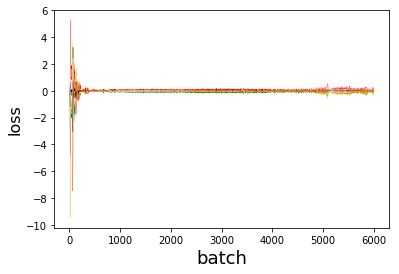

In [15]:
fig = plt.figure()
plt.plot([x[0] for x in gan.d_losses], color='black', linewidth=0.25)

plt.plot([x[1] for x in gan.d_losses], color='green', linewidth=0.25)
plt.plot([x[2] for x in gan.d_losses], color='red', linewidth=0.25)
plt.plot(gan.g_losses, color='orange', linewidth=0.25)

plt.xlabel('batch', fontsize=18)
plt.ylabel('loss', fontsize=16)

# plt.xlim(0, 2000)
# plt.ylim(0, 2)

plt.show()

In [16]:
def compare_images(img1, img2):
    return np.mean(np.abs(img1 - img2))

In [17]:

r, c = 5, 5

idx = np.random.randint(0, x_train.shape[0], BATCH_SIZE)
true_imgs = (x_train[idx] + 1) *0.5

fig, axs = plt.subplots(r, c, figsize=(15,15))
cnt = 0

for i in range(r):
    for j in range(c):
        axs[i,j].imshow(true_imgs[cnt], cmap = 'gray_r')
        axs[i,j].axis('off')
        cnt += 1
fig.savefig(os.path.join(RUN_FOLDER, "images/real.png"))
plt.close()

In [18]:
r, c = 5, 5
noise = np.random.normal(0, 1, (r * c, gan.z_dim))
gen_imgs = gan.generator.predict(noise)

#Rescale images 0 - 1

gen_imgs = 0.5 * (gen_imgs + 1)
# gen_imgs = np.clip(gen_imgs, 0, 1)

fig, axs = plt.subplots(r, c, figsize=(15,15))
cnt = 0

for i in range(r):
    for j in range(c):
        axs[i,j].imshow(np.squeeze(gen_imgs[cnt, :,:,:]), cmap = 'gray_r')
        axs[i,j].axis('off')
        cnt += 1
fig.savefig(os.path.join(RUN_FOLDER, "images/sample.png"))
plt.close()


fig, axs = plt.subplots(r, c, figsize=(15,15))
cnt = 0

for i in range(r):
    for j in range(c):
        c_diff = 99999
        c_img = None
        for k_idx, k in enumerate((x_train + 1) * 0.5):
            
            diff = compare_images(gen_imgs[cnt, :,:,:], k)
            if diff < c_diff:
                c_img = np.copy(k)
                c_diff = diff
        axs[i,j].imshow(c_img, cmap = 'gray_r')
        axs[i,j].axis('off')
        cnt += 1

fig.savefig(os.path.join(RUN_FOLDER, "images/sample_closest.png"))
plt.close()